<a href="https://colab.research.google.com/github/uwaezuokeac/SupportVectorRegression/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Position_Salaries.csv to Position_Salaries.csv


In [6]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Position_Salaries.csv']))
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values


In [7]:
print (x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [8]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [9]:
#reshaping y to 2D array so we can apply feature scaling

y= y.reshape(len(y),1)

In [10]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
x_sc=StandardScaler()
y_sc=StandardScaler()
x=x_sc.fit_transform(x)
y=y_sc.fit_transform(y)

In [12]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [13]:
print(y)


[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [14]:
from sklearn.svm import SVR
regressor =SVR(kernel='rbf')
regressor.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [15]:
y_sc.inverse_transform(regressor.predict(x_sc.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

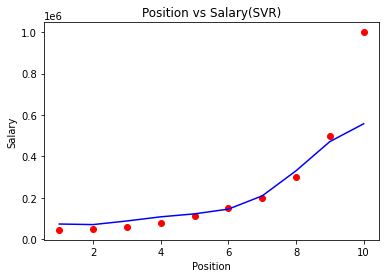

In [16]:
plt.scatter(x_sc.inverse_transform(x),y_sc.inverse_transform(y), color='red')
plt.plot(x_sc.inverse_transform(x),y_sc.inverse_transform(regressor.predict((x))), color = 'blue',)
plt.title("Position vs Salary(SVR)")
plt.xlabel('Position')
plt.ylabel('Salary')

plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

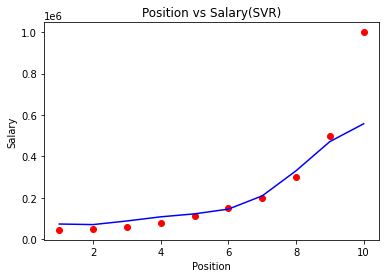

In [25]:
x_grid = np.arange(min(x_sc.inverse_transform(x)), max(x_sc.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_sc.inverse_transform(x),y_sc.inverse_transform(y), color = 'red')
plt.plot(x_sc.inverse_transform(x), y_sc.inverse_transform(regressor.predict((x))), color = 'blue')
plt.title("Position vs Salary(SVR)")
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()